In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
austin_crime = pd.read_csv('data/crime-housing-austin-2015.csv')

austin_crime = austin_crime.drop('Location', axis=1)

def percentage_to_float(value):
    try:
        return float(value.strip('%')) / 100
    except:
        return value

def currency_to_float(value):
    try:
        return float(value.replace('$', '').replace(',', ''))
    except:
        return value

percentage_columns = [
    'Populationbelowpovertylevel', 'Non-WhiteNon-HispanicorLatino', 
    'HispanicorLatinoofanyrace', 'Populationwithdisability', 'Unemployment',
    'Largehouseholds(5+members)', 'Homesaffordabletopeopleearninglessthan$50000',
    'Rentalsaffordabletopeopleearninglessthan$25000', 'Rent-restrictedunits',
    'HousingChoiceVoucherholders', 'Percentageofrentalunitsinpoorcondition',
    'Percentchangeinnumberofhousingunits2000-2012',
    'Changeinpercentageofpopulationbelowpoverty2000-2012',
    'Changeinmedianrent2000-2012', 'Changeinmedianhomevalue2000-2012',
    'Percentageofhomeswithin1/4-mioftransitstop',
    'Percentageofhousingandtransportationcoststhatistransportation-related'
]

currency_columns = ['Medianhouseholdincome', 'Medianrent', 'Medianhomevalue', 'Averagemonthlytransportationcost']


for col in percentage_columns:
    austin_crime[col] = austin_crime[col].apply(percentage_to_float)

for col in currency_columns:
    austin_crime[col] = austin_crime[col].apply(currency_to_float)

print(austin_crime.dtypes)

Key                                                                        int64
Council_District                                                         float64
Highest_Offense_Desc                                                      object
Highest_NIBRS_UCR_Offense_Description                                     object
Report_Date                                                               object
Clearance_Status                                                          object
Clearance_Date                                                            object
District                                                                  object
Zip_Code_Crime                                                           float64
Census_Tract                                                             float64
X_Coordinate                                                             float64
Y_Coordinate                                                             float64
Zip_Code_Housing            

In [17]:
austin_crime.head()

Key  Council_District       Highest_Offense_Desc  \
0  201510782               4.0  AGG ROBBERY/DEADLY WEAPON   
1  201511231               4.0         ROBBERY BY ASSAULT   
2  201511736               1.0      BURGLARY OF RESIDENCE   
3  201511433               4.0      BURGLARY OF RESIDENCE   
4  201511936               2.0      BURGLARY OF RESIDENCE   

  Highest_NIBRS_UCR_Offense_Description Report_Date Clearance_Status  \
0                               Robbery    1-Jan-15                N   
1                               Robbery    1-Jan-15                N   
2                              Burglary    1-Jan-15                N   
3                              Burglary    1-Jan-15                N   
4                              Burglary    1-Jan-15                N   

  Clearance_Date District  Zip_Code_Crime  Census_Tract  ...  \
0      28-Jan-15        E         78753.0         18.13  ...   
1      13-Jan-15        I         78751.0         21.05  ...   
2      13-Jan-15        E         78753.0         18.35  ...   
3       5-Jan-15        I         78753.0         18.13  ...   
4       7-Jan-15        F         78744.0         24.27  ...   

   Rentalunitsaffordabletoaverageteacher  \
0                                    89%   
1                                    68%   
2                                    89%   
3                                    89%   
4                                    81%   

   Ownerunitsaffordabletoaverageteacher  \
0                                   75%   
1                                   10%   
2                                   75%   
3                                   75%   
4                                   87%   

   Rentalunitsaffordabletoaveragetechworker  \
0                                      100%   
1                                       97%   
2                                      100%   
3                                      100%   
4                                      100%   

   Ownerunitsaffordabletoaveragetechworker  \
0                                      98%   
1                                      42%   
2                                      98%   
3                                      98%   
4                                     100%   

   Changeinpercentageofpopulationbelowpoverty2000-2012  \
0                                               1.28     
1                                               0.23     
2                                               1.28     
3                                               1.28     
4                                               0.89     

   Changeinmedianrent2000-2012  Changeinmedianhomevalue2000-2012  \
0                         0.26                              0.40   
1                         0.38                              0.97   
2                         0.26                              0.40   
3                         0.26                              0.40   
4                         0.26                              0.44   

   Percentageofhomeswithin1/4-mioftransitstop  \
0                                        0.59   
1                                        0.98   
2                                        0.59   
3                                        0.59   
4                                        0.63   

   Averagemonthlytransportationcost  \
0                             708.0   
1                             550.0   
2                             708.0   
3                             708.0   
4                             708.0   

   Percentageofhousingandtransportationcoststhatistransportation-related  
0                                               0.44                      
1                                               0.40                      
2                                               0.44                      
3                                               0.44                      
4                                               0.40                      

[

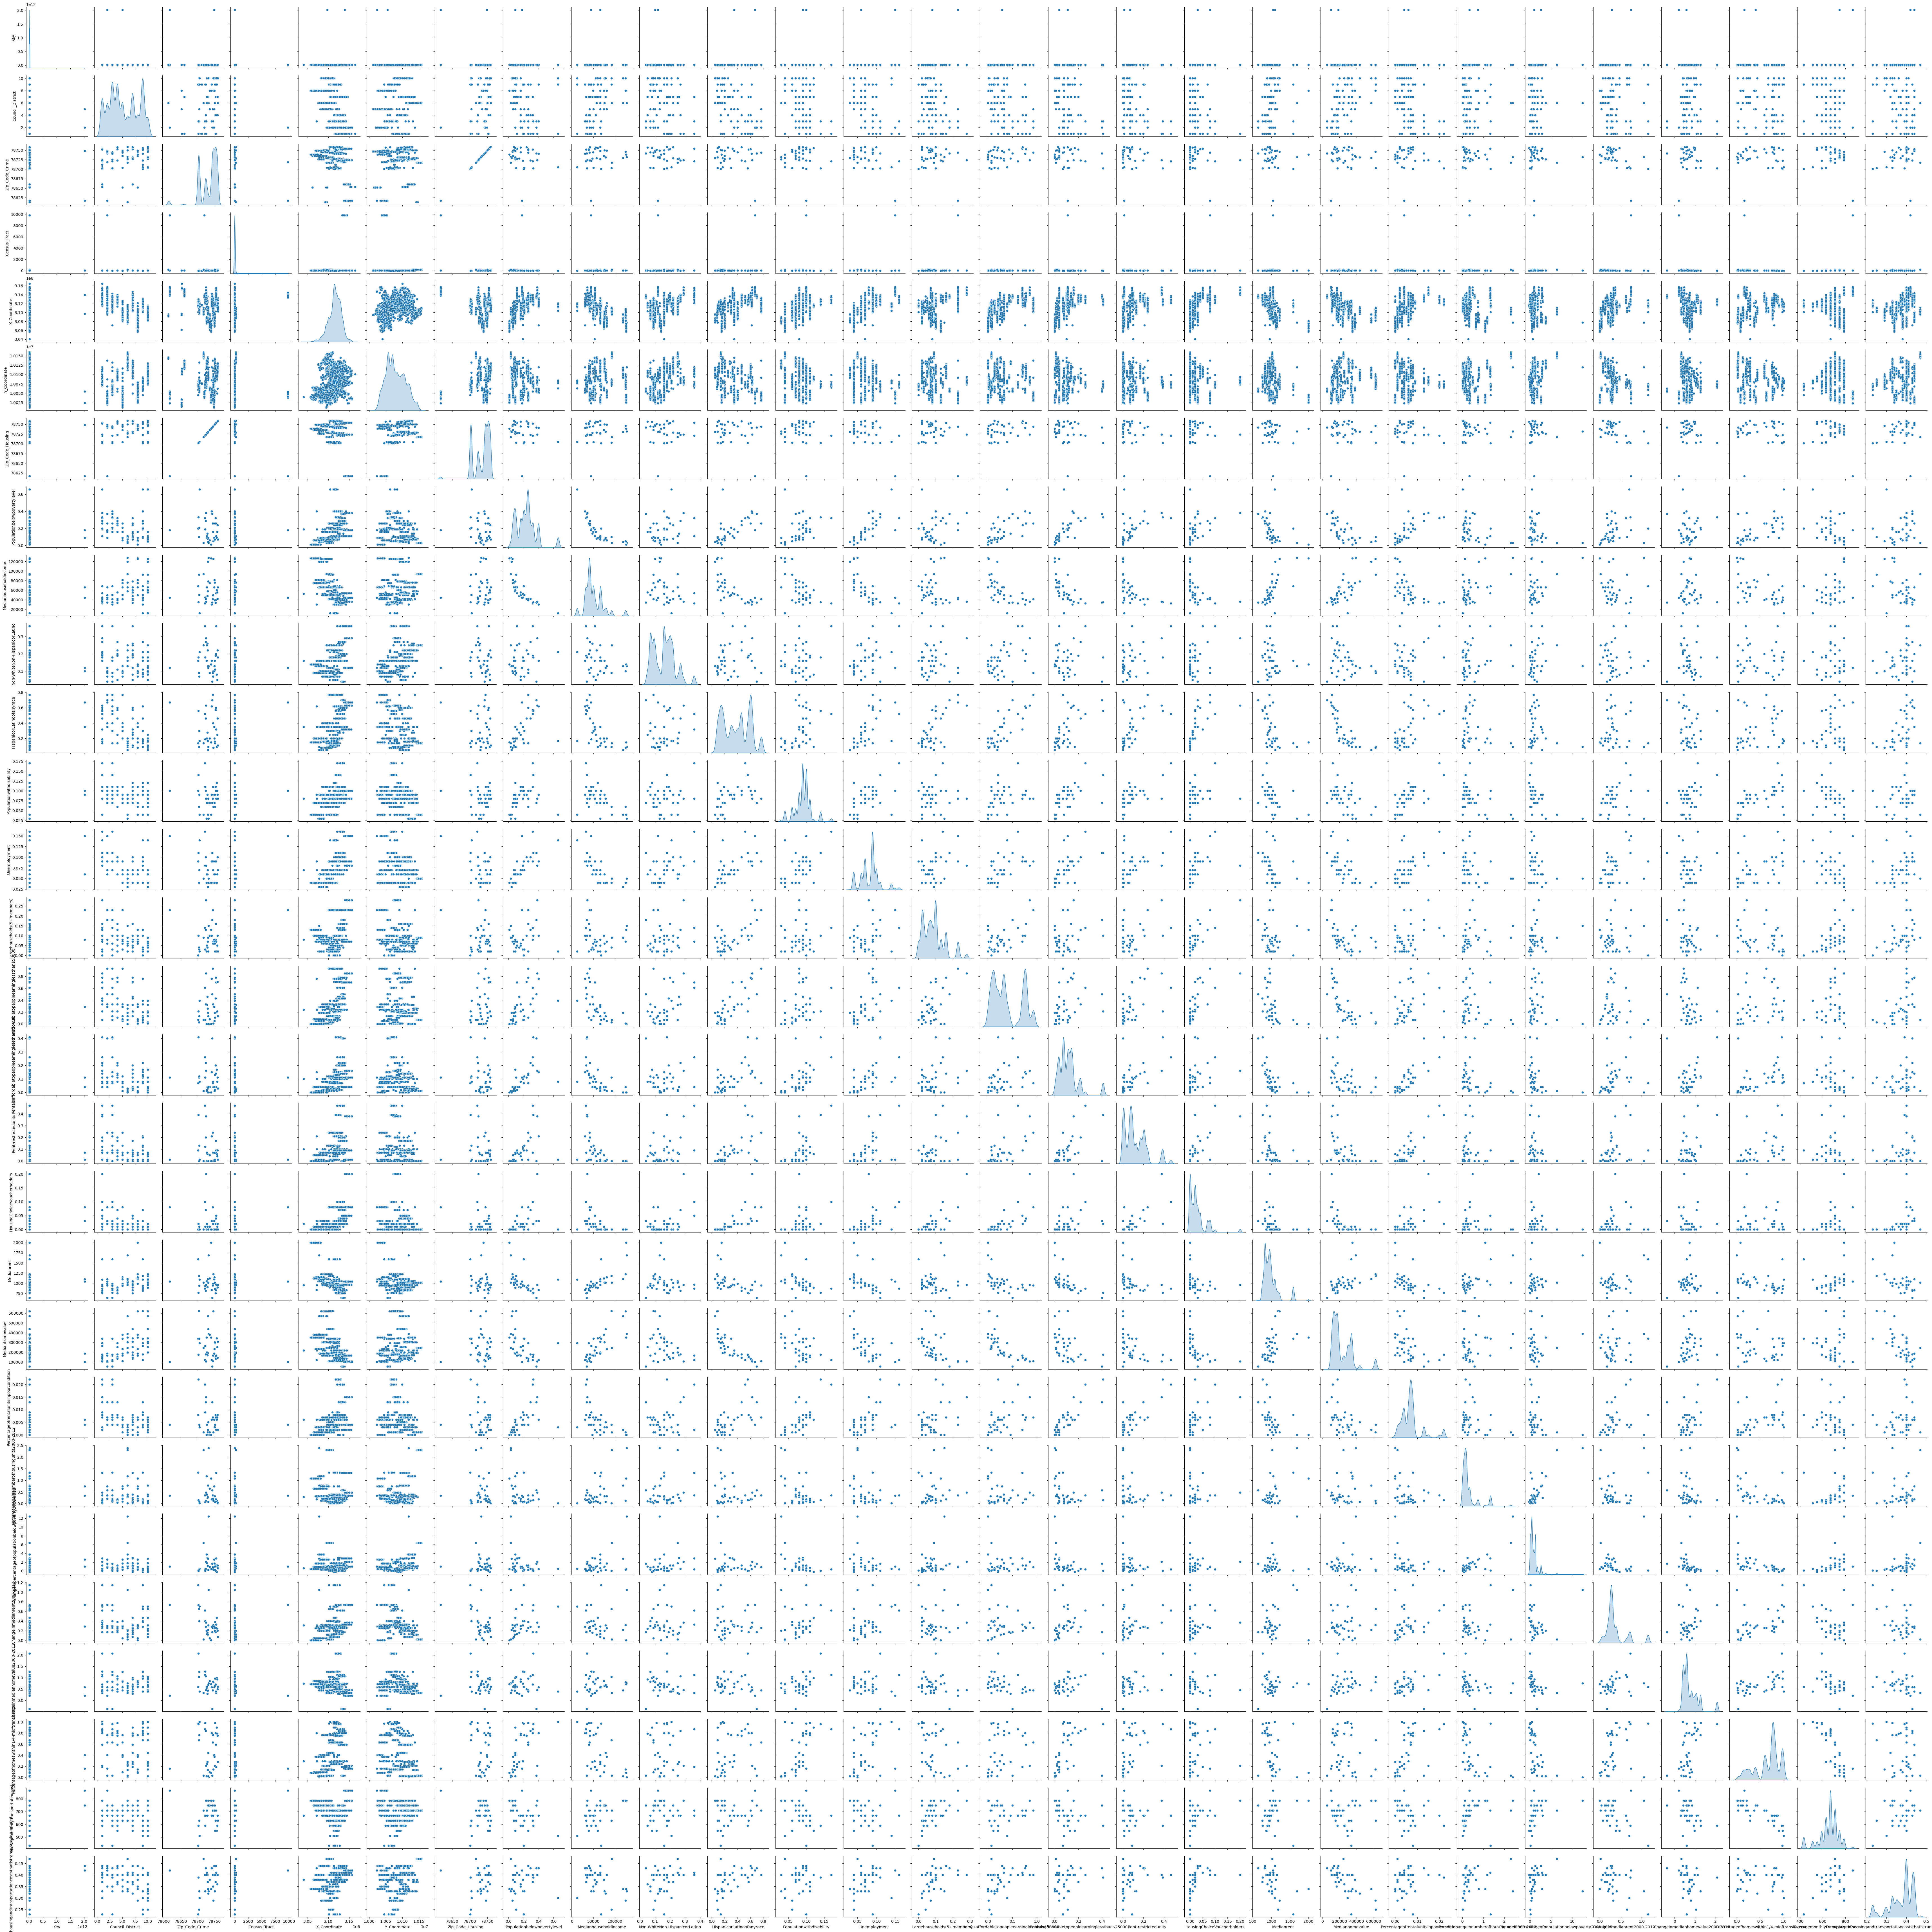

In [18]:
pairplot = sns.pairplot(austin_crime, diag_kind='kde')
plt.savefig('plots/pair_plot.png')

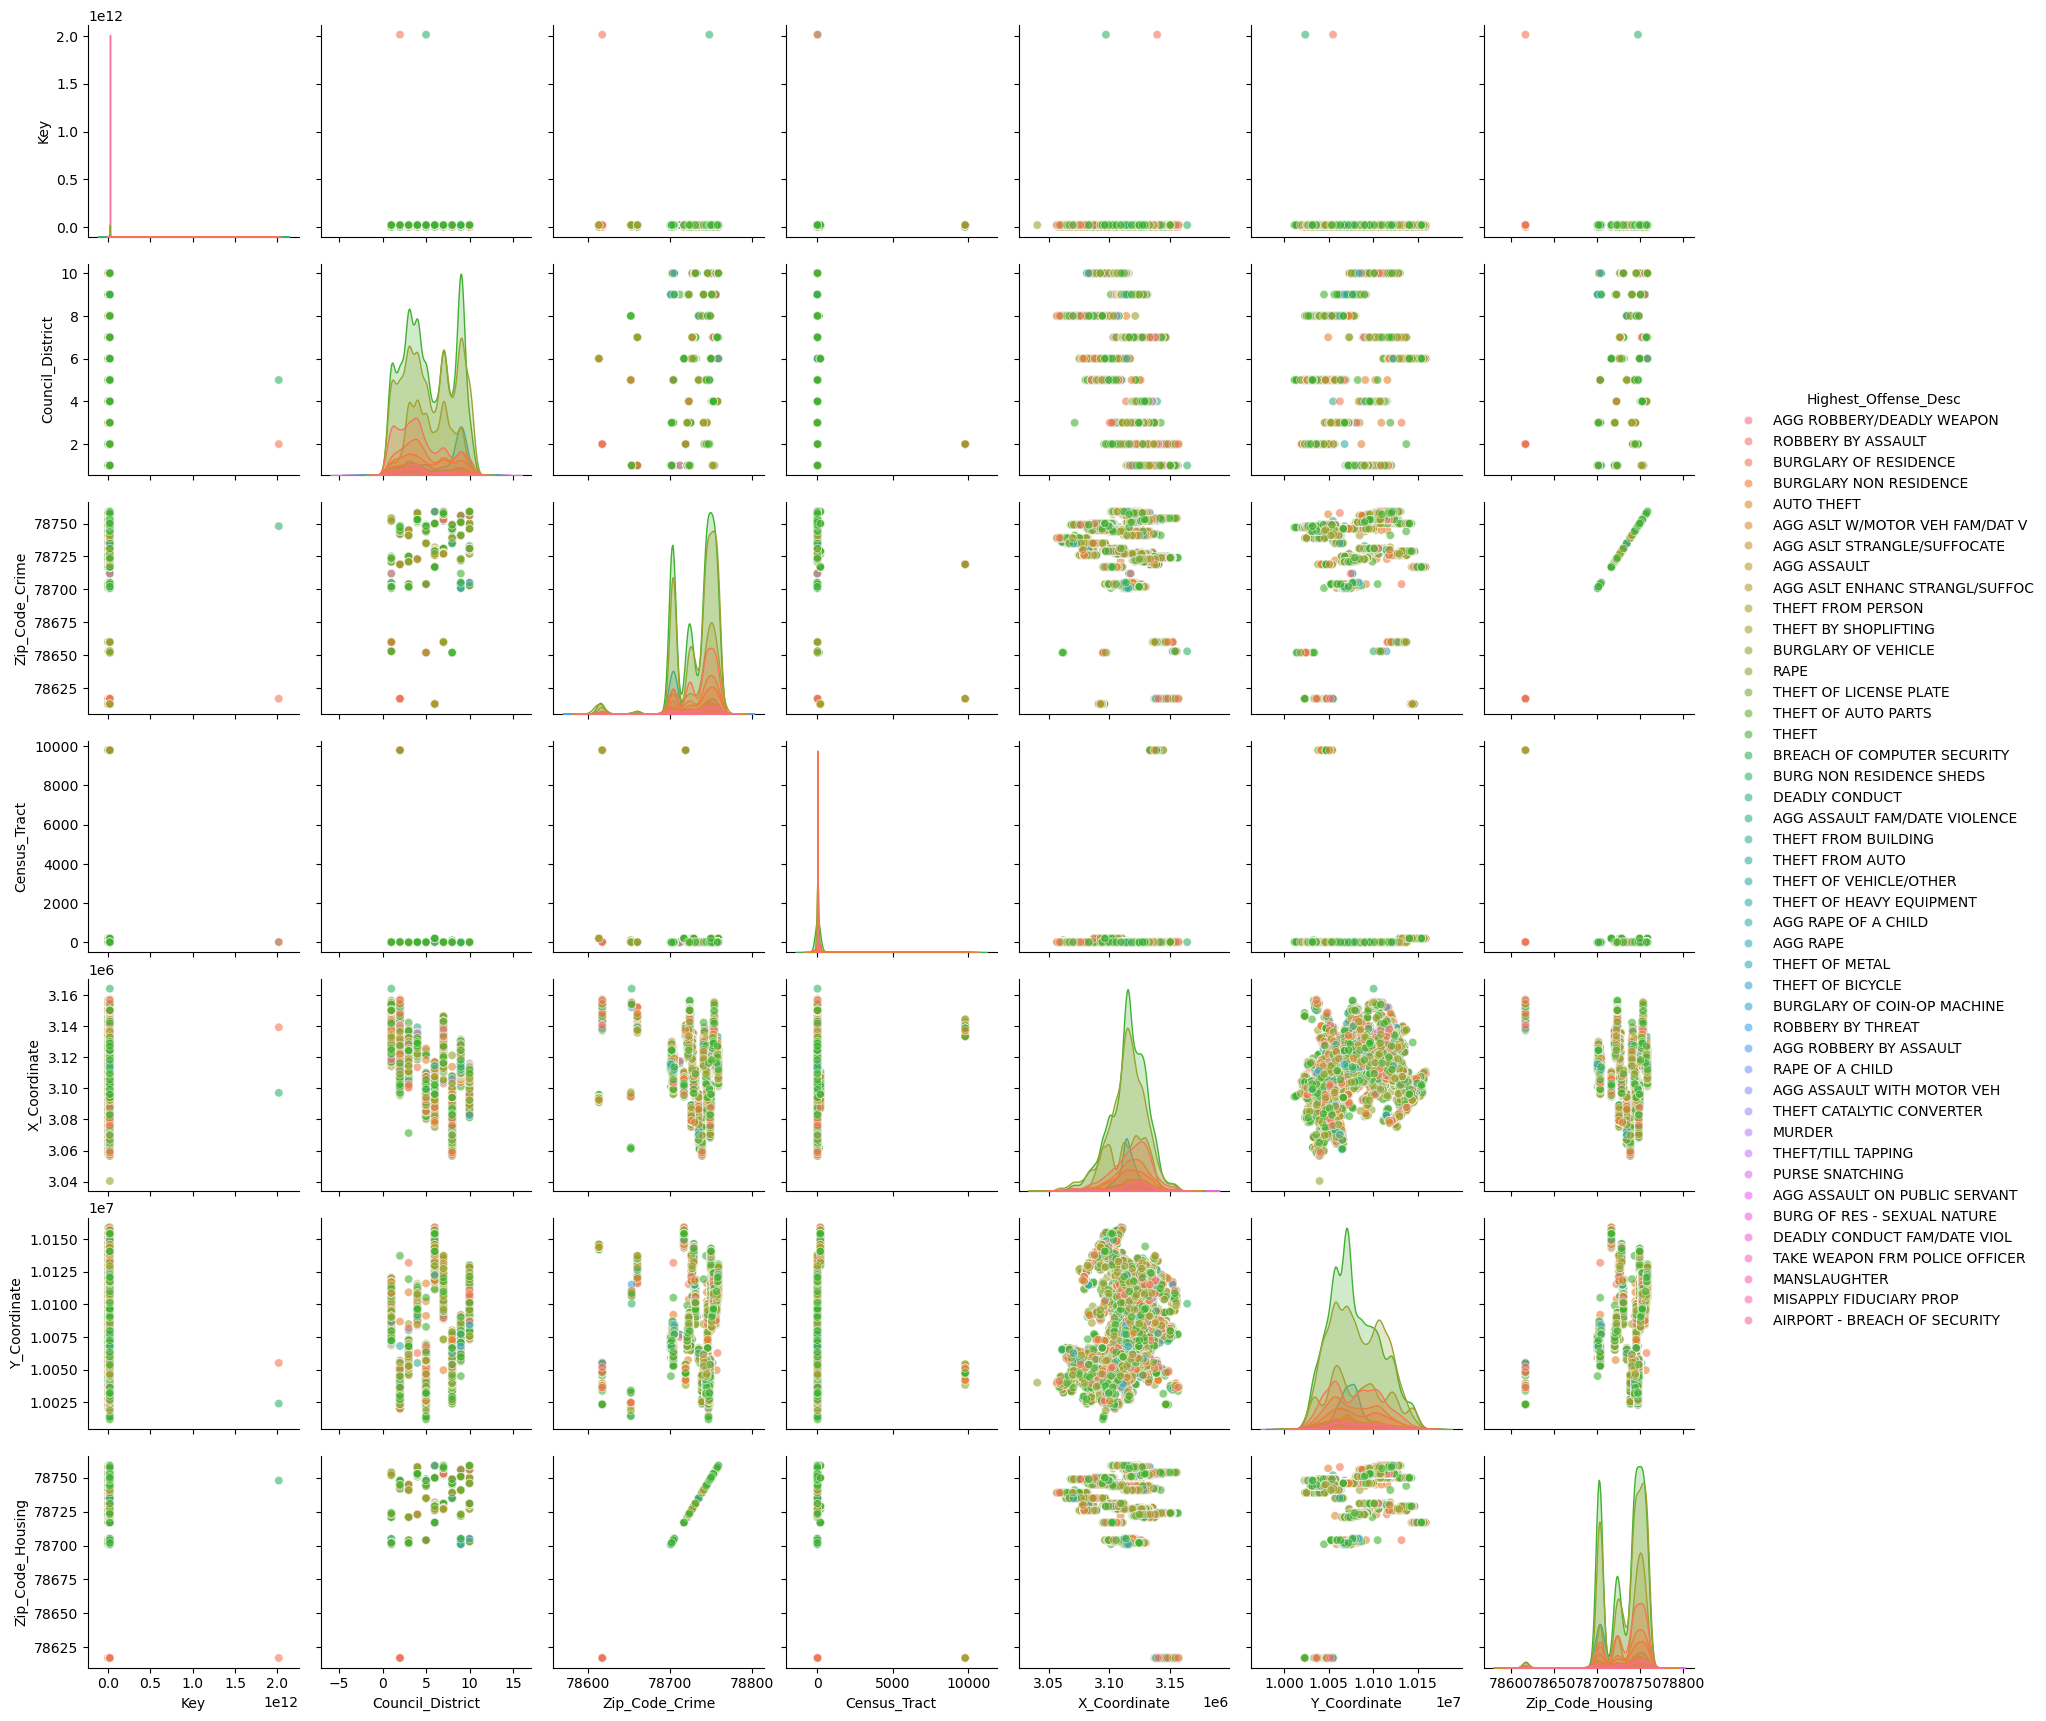

In [15]:
# pairplot = sns.pairplot(austin_crime, diag_kind='kde', hue='Highest_Offense_Desc', plot_kws={"alpha": 0.6})
# plt.savefig('plots/pair_plot_by_offense.png')